In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import soundfile
warnings.filterwarnings("ignore")

## Load the dataset

In [1]:
from merge_datasets import merge_datasets

all_datasets = merge_datasets(bangla=True,english_tess=False)
all_datasets

7000 Bangla DATA Loaded
                                              speech     label  corpus gender
0      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_1.wav     angry  Bangla      f
1      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_2.wav     angry  Bangla      f
2      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_3.wav     angry  Bangla      f
3      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_4.wav     angry  Bangla      f
4      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_5.wav     angry  Bangla      f
...                                              ...       ...     ...    ...
6995  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_1.wav  surprise  Bangla      m
6996  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_2.wav  surprise  Bangla      m
6997  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_3.wav  surprise  Bangla      m
6998  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_4.wav  surprise  Bangla      m
6999  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_5.wav  surprise  Bangla      m

[7000 rows x 4 columns]
7000 Bangla DAT

,speech,label,corpus,gender
0,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_1.wav,angry,Bangla,f
1,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_2.wav,angry,Bangla,f
2,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_3.wav,angry,Bangla,f
3,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_4.wav,angry,Bangla,f
4,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_5.wav,angry,Bangla,f
...,...,...,...,...
6995,./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_1.wav,surprise,Bangla,m
6996,./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_2.wav,surprise,Bangla,m
6997,./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_3.wav,surprise,Bangla,m
6998,./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_4.wav,surprise,Bangla,m


In [2]:

df = all_datasets[['speech','label']]
# df = df[df['label'] != 'disgust']

sns.countplot(df['label'])
df

NameError: name 'sns' is not defined

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time',y_axis='hz')
    plt.colorbar()
    

## Sample sound

In [ ]:
emotions = ['neutral','angry']

for emotion in emotions:
    path = df['speech'][df['label'] == emotion]
    data, sampling_rate=librosa.load(path.iloc[1])
    waveplot(data, sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
Audio(path.iloc[1])

In [ ]:
# audio_path1 = "./SUBESCO/SUBESCO/M_02_NIPUN_S_7_ANGRY_1.wav"
# audio_path2 = "./SUBESCO/SUBESCO/M_02_NIPUN_S_7_SAD_1.wav"
# audio_path3 = "./SUBESCO/SUBESCO/M_02_NIPUN_S_7_NEUTRAL_1.wav"
# audio_path4 = "./SUBESCO/SUBESCO/M_02_NIPUN_S_7_FEAR_1.wav"
# audio_paths = [audio_path1,audio_path2,audio_path3,audio_path4]
# for audio_path in audio_paths:
#     y, sr = librosa.load(audio_path)
#     zcr = librosa.feature.zero_crossing_rate(y).max()
#     print(zcr)
# sr

## Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y ,sr = librosa.load(filename, duration=5, offset=0.5)
    mfcc =np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc


    
def extract_features(file_name, mfcc, chroma, mel, cent, zcr):
#     waveplot(data, sampling_rate,emotion)
#     spectogram(data,sampling_rate,emotion)
    y ,sr = librosa.load(file_name, duration=5, offset=0.5)
    result=np.array([])
    if(mfcc):
        mfccs =np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
#         print(mfccs.shape)
        result=np.hstack((result, mfccs))
    if(chroma):
        stft=np.abs(librosa.stft(y))
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
#         print(chroma.shape)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(y, sr=sr,win_length=1000).T,axis=0)
#         print(mel.shape)
        result=np.hstack((result, mel))
    if cent:
        cent=np.mean(librosa.feature.tonnetz(y, sr=sr).T,axis=0)
#         print(cent.shape)
        result=np.hstack((result, cent))
    if zcr:
        zcr =np.mean(librosa.feature.zero_crossing_rate(y=y,frame_length=5, hop_length  = 5100 ).T,axis=1)
#         print(zcr.shape)
        result=np.hstack((result, zcr))
    return result

# extract_features("./SUBESCO/SUBESCO/M_02_NIPUN_S_7_HAPPY_4.wav", mfcc=True, chroma=True, mel=True)


## Extract mfcc 

In [169]:
X_mfcc = df['speech'].apply(lambda x: extract_features(x, mfcc=True, chroma=True, mel=False,cent=False,zcr=False))


In [160]:
type(X_mfcc)

pandas.core.series.Series

## Expand dimension

In [170]:
X = [ x for x in X_mfcc]

X= np.array(X)  
type(X)
# np.save('./datasets_feature_extracted/banglaenglish__mfcc_chroma.npy', X)
# np.save('./datasets_feature_extracted/bangla__mfcc_chroma.npy', X)
np.save('./datasets_feature_extracted/namgl.npy', X)

In [7]:

# new_num_arr = np.load('./datasets_feature_extracted/banglaenglish__mfcc_chroma.npy')
# new_num_arr = np.load('./datasets_feature_extracted/bangla__mfcc_chroma.npy')
new_num_arr = np.load('./datasets_feature_extracted/bangla.npy')

X = new_num_arr
X

array([[-197.97003174,   53.90197754,   -7.4734993 , ...,    0.5988701 ,
           0.61972553,    0.64276892],
       [-198.51574707,   47.22080612,   -7.35757685, ...,    0.5335415 ,
           0.56096816,    0.61461717],
       [-188.63711548,   48.89306259,   -5.5370574 , ...,    0.57986182,
           0.59387863,    0.61875707],
       ...,
       [-324.70007324,   46.46383667,    6.26996136, ...,    0.64188981,
           0.69848889,    0.71040708],
       [-306.1288147 ,   49.42455292,    6.73407221, ...,    0.6245451 ,
           0.70103371,    0.72191894],
       [-293.4005127 ,   50.33232498,    4.06147528, ...,    0.69915509,
           0.72552806,    0.6852355 ]])

In [8]:

X=np.expand_dims(X, -1)
print(X.shape)
print(X[0])

(7000, 52, 1)
[[-1.97970032e+02]
 [ 5.39019775e+01]
 [-7.47349930e+00]
 [ 1.54062595e+01]
 [-1.64477658e+00]
 [ 6.70004368e-01]
 [-5.09518337e+00]
 [-2.41899991e+00]
 [-6.94994211e+00]
 [ 1.66377449e+00]
 [-4.45638943e+00]
 [-1.83087826e+00]
 [-2.63091826e+00]
 [ 7.52181411e-01]
 [-3.87786865e+00]
 [-1.84587598e+00]
 [-3.07073021e+00]
 [-7.91006207e-01]
 [-3.81855321e+00]
 [ 7.40493655e-01]
 [-6.76647246e-01]
 [ 2.83525729e+00]
 [ 2.72117305e+00]
 [ 8.32362747e+00]
 [ 3.06120205e+00]
 [ 5.90772438e+00]
 [ 1.62555230e+00]
 [ 2.93098593e+00]
 [ 6.70543194e-01]
 [ 2.71701884e+00]
 [ 8.51229578e-03]
 [ 3.99384356e+00]
 [ 5.54161489e-01]
 [ 3.15907979e+00]
 [-1.70438421e+00]
 [-5.74910343e-01]
 [-1.78887022e+00]
 [ 8.05806398e-01]
 [-1.05784154e+00]
 [ 8.99862409e-01]
 [ 6.66912377e-01]
 [ 6.73344135e-01]
 [ 6.73634529e-01]
 [ 6.35489941e-01]
 [ 5.07308662e-01]
 [ 4.57295358e-01]
 [ 4.84126896e-01]
 [ 5.20513892e-01]
 [ 5.51498234e-01]
 [ 5.98870099e-01]
 [ 6.19725525e-01]
 [ 6.42768919e-01

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

y = enc.fit_transform(df[['label']])

print(y.shape)
y
enc.categories_[0]

(7000, 7)


array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [10]:
y = y.toarray()
print(y.shape)

(7000, 7)


In [11]:
inp_shape = X[0].shape[0]
inp_shape

52

## LSTM MODEL

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Conv1D,MaxPooling1D,Flatten,GlobalAveragePooling1D,BatchNormalization
from keras.callbacks import ReduceLROnPlateau

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_61 (Conv1D)          (None, 51, 128)           384       
                                                                 
 max_pooling1d_40 (MaxPoolin  (None, 25, 128)          0         
 g1D)                                                            
                                                                 
 batch_normalization_36 (Bat  (None, 25, 128)          512       
 chNormalization)                                                
                                                                 
 conv1d_62 (Conv1D)          (None, 24, 64)            16448     
                                                                 
 max_pooling1d_41 (MaxPoolin  (None, 12, 64)           0         
 g1D)                                                            
                                                     

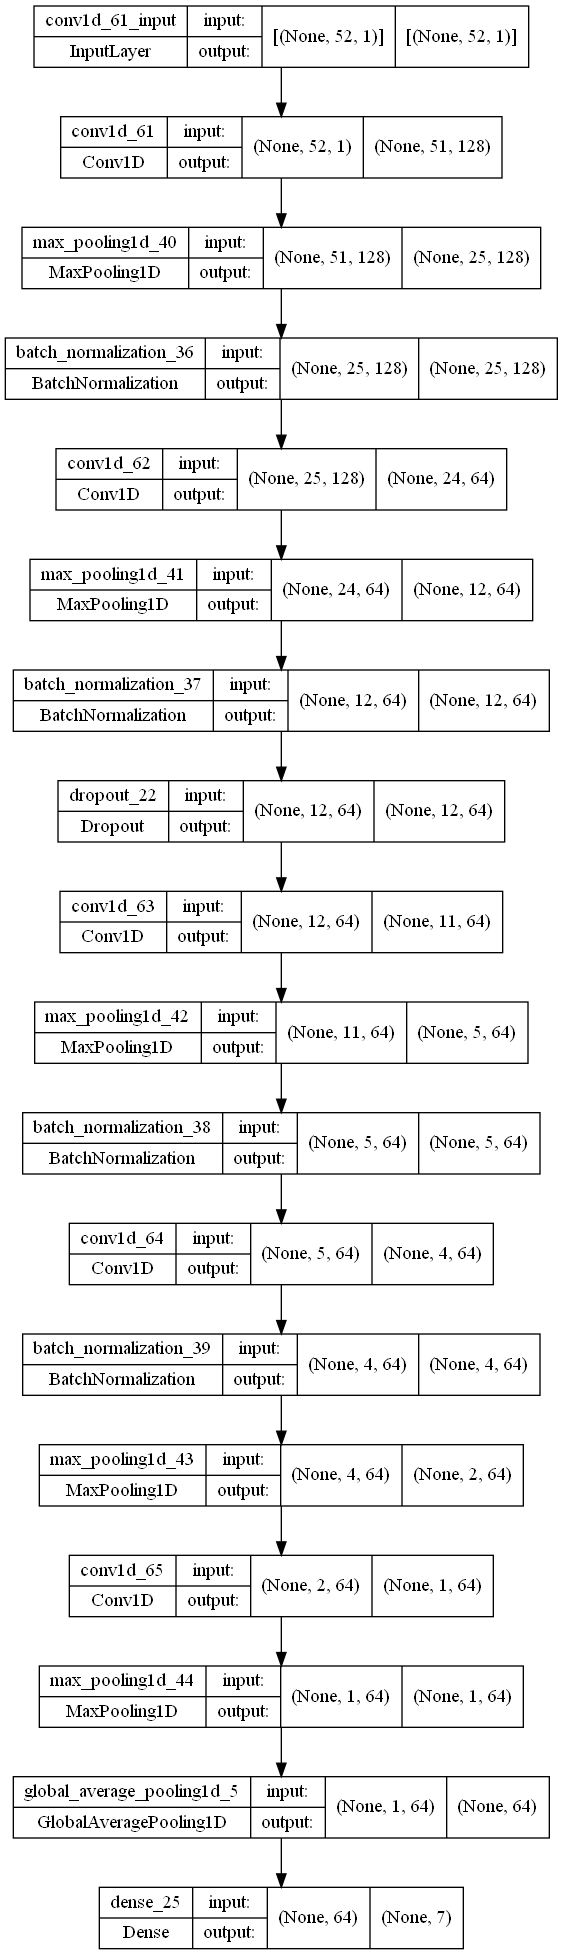

In [57]:
unq = len(df['label'].unique())
# model = Sequential([
#     LSTM(128, return_sequences=True, input_shape=(inp_shape,1)),
#     LSTM(64, return_sequences=False, input_shape=(inp_shape,1)),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(unq, activation='softmax'),
# ])

model = Sequential([
    Conv1D(128, 2, activation="relu", input_shape=(inp_shape,1)),
    MaxPooling1D(pool_size=2,strides=2, padding='valid'),
    BatchNormalization(),
    Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
    
    MaxPooling1D(pool_size=2,strides=2, padding='valid'),
    BatchNormalization(),
    Dropout(0.2),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
    Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
    MaxPooling1D(pool_size=2,strides=2, padding='valid'),
    BatchNormalization(),
    Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2,strides=2, padding='valid'),
    Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
    MaxPooling1D(pool_size=1,strides=2, padding='valid'),
    GlobalAveragePooling1D(),
#     Dropout(0.2),
    Dense(unq, activation='softmax'),
])

# cv + lstm
# model = Sequential([
#     Conv1D(128, 2, activation="relu", input_shape=(inp_shape,1)),
#     BatchNormalization(),
#     MaxPooling1D(pool_size=2,strides=2, padding='valid'),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     BatchNormalization(),
#     MaxPooling1D(pool_size=2,strides=2, padding='valid'),
#     Dropout(0.2),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     BatchNormalization(),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     BatchNormalization(),
#     MaxPooling1D(pool_size=2,strides=2, padding='valid'),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     MaxPooling1D(pool_size=1,strides=2, padding='valid'),
# #     GlobalAveragePooling1D(),
#     LSTM(32),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dropout(0.2),
#     Dense(unq, activation='softmax'),
# ])

# model = Sequential([
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     MaxPooling1D(pool_size=2,strides=2, padding='valid'),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     MaxPooling1D(pool_size=2,strides=2, padding='valid'),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     Conv1D(64, 2, activation="relu", input_shape=(inp_shape,1)),
#     MaxPooling1D(),
# #     GlobalAveragePooling1D(),
#     LSTM(128),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dropout(0.2),
#     Dense(unq, activation='softmax'),
# ])

from tensorflow.keras.utils import plot_model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [47]:
import tensorflow as tf
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    min_lr=0.00001,

)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,

    restore_best_weights=True,
)

## Train the model

In [48]:
# y = np.asarray(y).astype(np.float32)
# X = np.asarray(X).astype(np.float32)
# print(y)


from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle= True)
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_data=(x_valid, y_valid), callbacks=[reduce_lr, early_stop])


Epoch 1/100
77/77 [==============================] - 4s 22ms/step - loss: 1.6897 - accuracy: 0.3310 - val_loss: 1.9968 - val_accuracy: 0.1938 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 21ms/step - loss: 1.3632 - accuracy: 0.4737 - val_loss: 1.6948 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 19ms/step - loss: 1.2352 - accuracy: 0.5257 - val_loss: 1.2608 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 19ms/step - loss: 1.1325 - accuracy: 0.5629 - val_loss: 1.1295 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 20ms/step - loss: 1.0617 - accuracy: 0.5902 - val_loss: 1.0127 - val_accuracy: 0.6252 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9959 - accuracy: 0.6255 - val_loss: 0.9668 - val_accuracy: 0.6362 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 1s 18ms/step - lo

77/77 [==============================] - 2s 22ms/step - loss: 0.1863 - accuracy: 0.9373 - val_loss: 0.5498 - val_accuracy: 0.8210 - lr: 1.0000e-04
Epoch 54/100
77/77 [==============================] - 2s 26ms/step - loss: 0.1810 - accuracy: 0.9459 - val_loss: 0.5391 - val_accuracy: 0.8267 - lr: 1.0000e-04
Epoch 55/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1731 - accuracy: 0.9443 - val_loss: 0.5358 - val_accuracy: 0.8281 - lr: 1.0000e-05
Epoch 56/100
77/77 [==============================] - 2s 25ms/step - loss: 0.1771 - accuracy: 0.9404 - val_loss: 0.5360 - val_accuracy: 0.8262 - lr: 1.0000e-05
Epoch 57/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1661 - accuracy: 0.9520 - val_loss: 0.5370 - val_accuracy: 0.8257 - lr: 1.0000e-05
Epoch 58/100
77/77 [==============================] - 2s 28ms/step - loss: 0.1666 - accuracy: 0.9455 - val_loss: 0.5365 - val_accuracy: 0.8248 - lr: 1.0000e-05
Epoch 59/100
77/77 [==============================] -

## Plot the result

In [28]:
Y_pred = model.predict(X)

np.argmax(Y_pred)

y_pred_labels = [np.argmax(i) for i in Y_pred]
y_real_labels = [np.argmax(i) for i in y]


In [29]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_real_labels,predictions=y_pred_labels)

Text(69.0, 0.5, 'Truth')

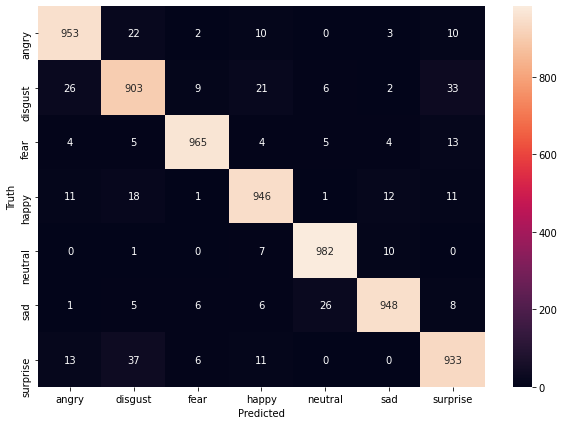

In [30]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True,fmt='d',xticklabels=enc.categories_[0],yticklabels=enc.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
import pickle

In [32]:

model.save("./models/84.h5")

In [49]:
from tensorflow import keras
loaded_model = keras.models.load_model('./models/84.h5')
loaded_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 51, 128)           384       
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 25, 128)          0         
 g1D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 25, 128)          512       
 chNormalization)                                                
                                                                 
 conv1d_35 (Conv1D)          (None, 24, 64)            16448     
                                                                 
 conv1d_36 (Conv1D)          (None, 23, 64)            8256      
                                                                 
 batch_normalization_17 (Bat  (None, 23, 64)          

In [50]:
Y_pred = loaded_model.predict(x_valid)

Text(69.0, 0.5, 'Truth')

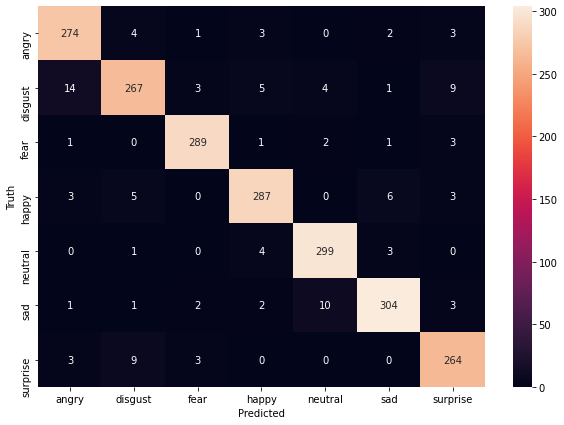

In [51]:


y_pred_labels = [np.argmax(i) for i in Y_pred]
y_real_labels = [np.argmax(i) for i in y_valid]
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_real_labels,predictions=y_pred_labels)
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True,fmt='d',xticklabels=enc.categories_[0],yticklabels=enc.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
loaded_model.evaluate(X, y)

219/219 [==============================] - 1s 3ms/step - loss: 0.1933 - accuracy: 0.9471


[0.19333815574645996, 0.9471428394317627]

ValueError: x and y must have same first dimension, but have shapes (29,) and (45,)

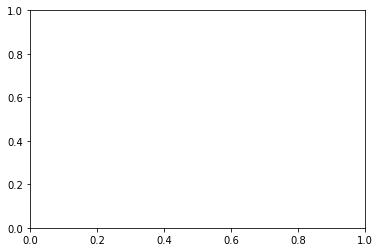

In [37]:
epochs = list(range(29))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


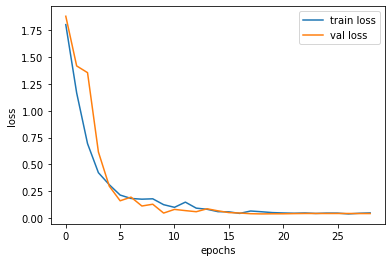

In [578]:
epochs = list(range(29))
acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(epochs, acc, label='train loss')
plt.plot(epochs, val_acc, label='val loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 64)            8256      
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 64)            8256      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 64)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 64)             8

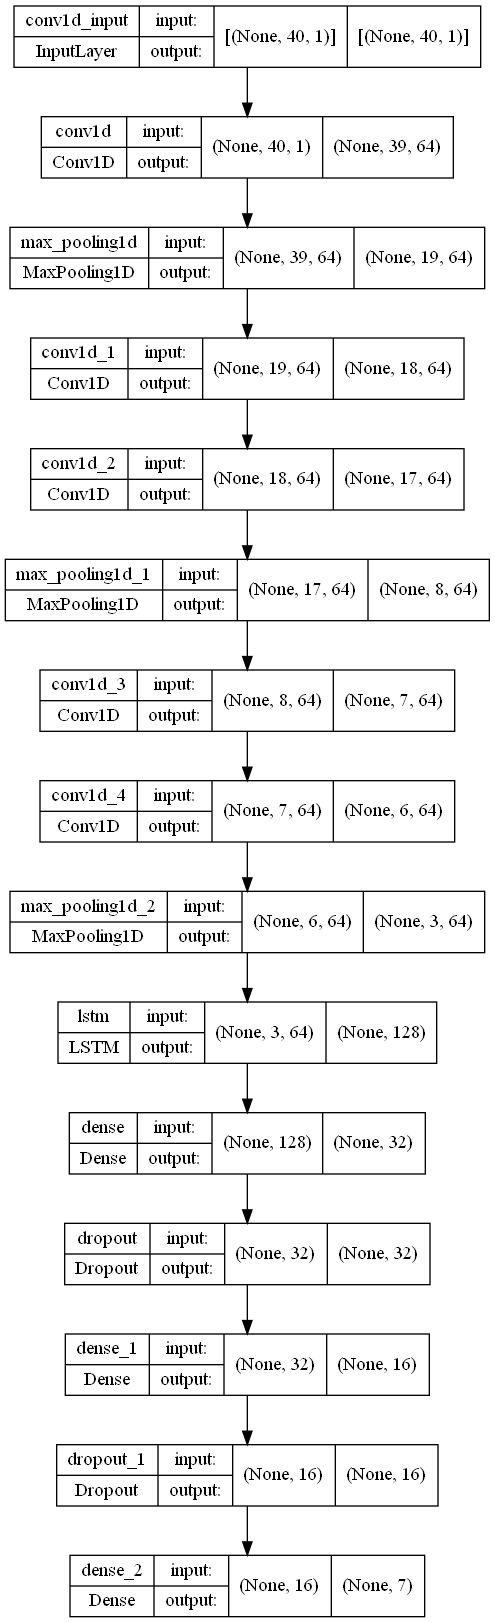

In [494]:
from tensorflow import keras
loaded_model = keras.models.load_model('./models/english_3_cv_lstm.h5')
loaded_model.summary()
from keras.utils.vis_utils import plot_model
plot_model(loaded_model, to_file='english_3_cv_lstm.png', show_shapes=True, show_layer_names=True)

In [2]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model    
plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'loaded_model' is not defined

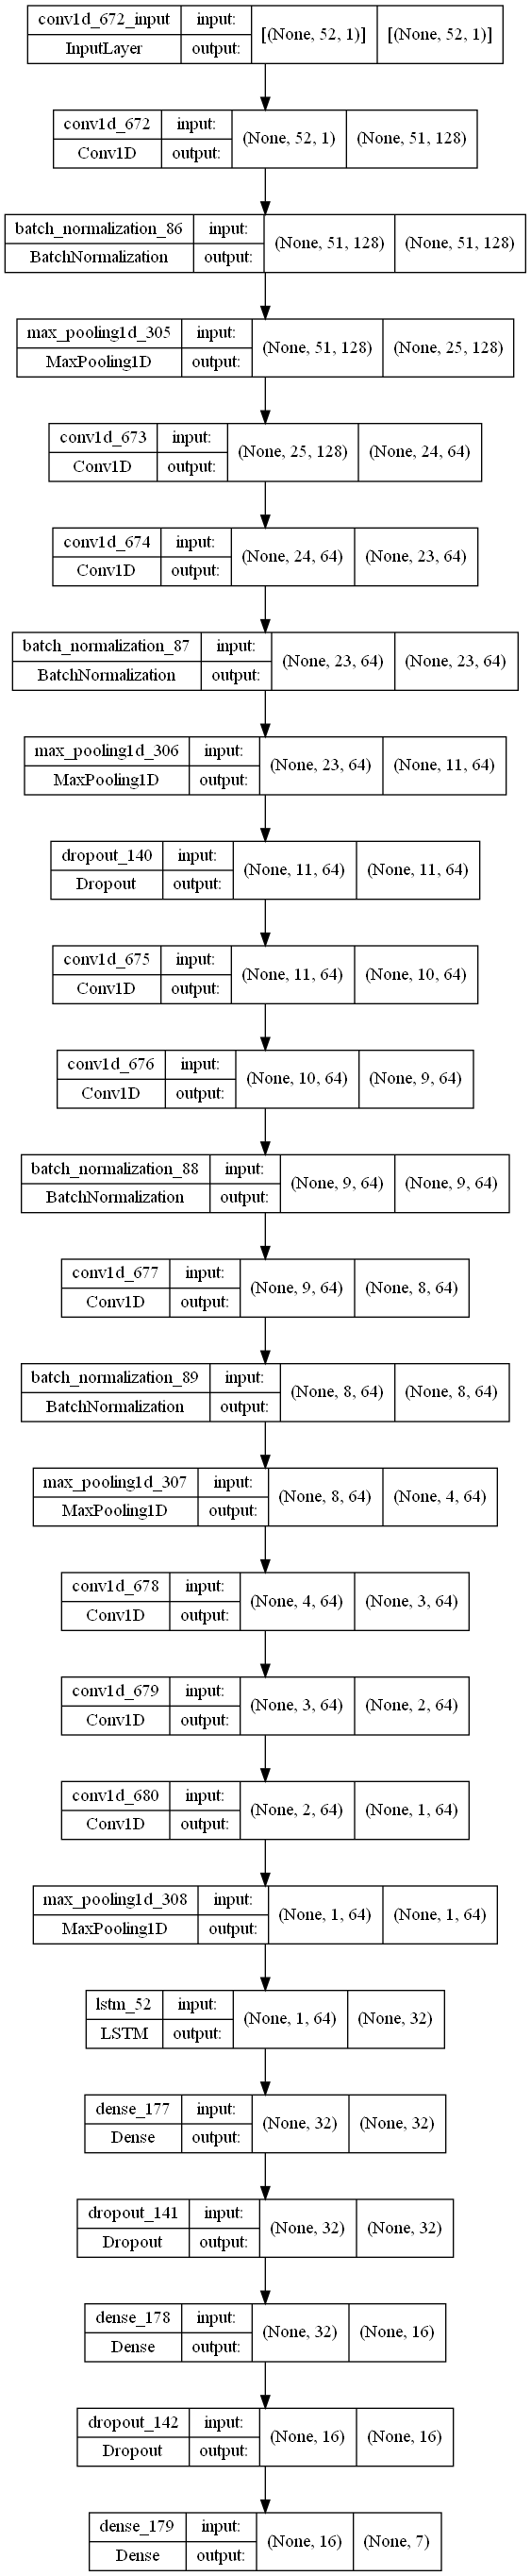

In [589]:
from tensorflow.keras.utils import plot_model
loaded_model = keras.models.load_model('./models/english_3_cv_lstm.h5')
# model = Model(...)

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [32]:
for i in range (0,3) :
    j = ['pogo', 'mati', 'syed+A']
    print("Shakib" +" loves " + j[i])

Shakib loves pogo
Shakib loves mati
Shakib loves syed+A
